Epoch 1/50


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5967 - loss: 0.6774 - val_accuracy: 0.6107 - val_loss: 0.6617
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.6435 - val_accuracy: 0.6412 - val_loss: 0.6460
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.6259 - val_accuracy: 0.6679 - val_loss: 0.6329
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6660 - loss: 0.6153 - val_accuracy: 0.6851 - val_loss: 0.6196
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.6073 - val_accuracy: 0.6908 - val_loss: 0.6103
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.5905 - val_accuracy: 0.6908 - val_loss: 0.6042
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.5879 - val_accuracy: 0.6908 - val_loss: 0.5976
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.5891 - val_accuracy: 0.6889 - val_loss: 0.5976
Epo

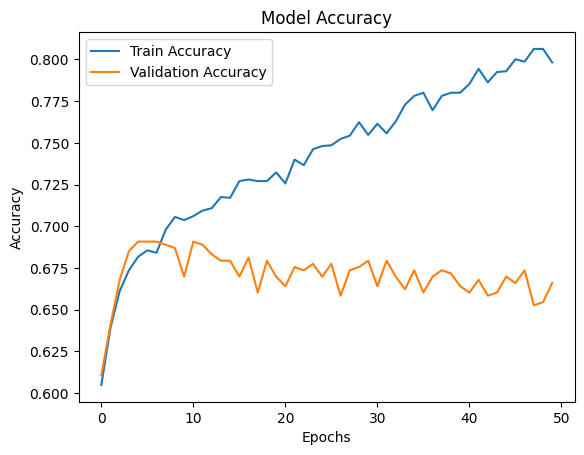

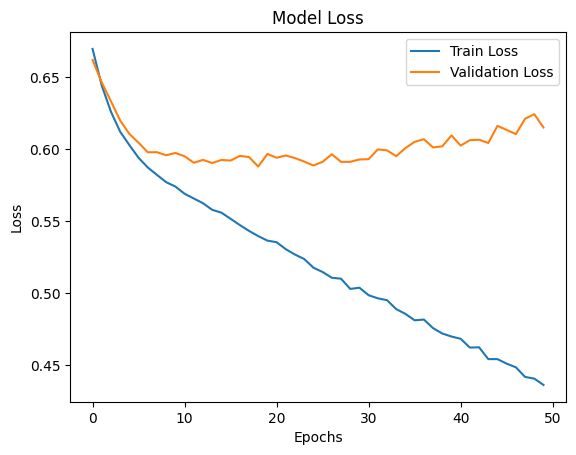

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Đọc dữ liệu
data = pd.read_csv("D:/ML_water_quality/dataset/water_potability.csv")

# Xử lý giá trị bị thiếu bằng phương pháp điền giá trị trung vị
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Tách đặc trưng (X) và nhãn (y)
X = data_imputed.drop('Potability', axis=1)
y = data_imputed['Potability']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Xây dựng mô hình ANN
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Lớp ẩn thứ nhất
    Dense(32, activation='relu'),                             # Lớp ẩn thứ hai
    Dense(1, activation='sigmoid')                            # Lớp đầu ra
])

# 4. Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 6. Đánh giá mô hình
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Vẽ biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()